### Estadistica - Fitness_analysis - C312
Integrantes:
- David Lezcano Becerra
- Alfredo Nuño Oquendo

In [24]:
import pandas as pd

# Ruta del primer archivo CSV
file_path1 = 'dailyActivity3-4.csv'

# Ruta del segundo archivo CSV
file_path2 = 'dailyActivity4-5.csv'

# Cargar el primer archivo CSV en un DataFrame
df1 = pd.read_csv(file_path1)

# Cargar el segundo archivo CSV en otro DataFrame
df2 = pd.read_csv(file_path2)

# Concatenar df2 al final de df1
df = pd.concat([df1, df2], ignore_index=True)

# Seleccionar todas las columnas excepto 'TrackerDistance', 'Date' y 'LoggedActivitiesDistance'
df = df.drop(columns=['Id', 'TrackerDistance', 'LoggedActivitiesDistance', 'ActivityDate'])

# Suponiendo que 'df' es tu DataFrame
# df = pd.DataFrame(...)

# Identificar las filas donde 'TotalSteps' es igual a 0
rows_to_drop = df[df['TotalSteps'] == 0].index

# Eliminar esas filas del DataFrame
df = df.drop(rows_to_drop)

# Obtener los nombres de las columnas como un array
column_names = df.columns.to_list()

# Imprimir el array de nombres de columnas
print(column_names)


pd.set_option('display.float_format', '{:.3f}'.format)
df.describe()

['TotalSteps', 'TotalDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']


,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,1259.000,1259.000,1259.000,1259.000,1259.000,1259.000,1259.000,1259.000,1259.000,1259.000,1259.000
mean,8078.963,5.792,1.551,0.597,3.543,0.002,21.768,14.348,205.692,951.506,2337.014
std,4870.241,3.793,2.703,0.894,1.932,0.008,32.668,20.511,101.261,290.430,730.941
min,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,50.000
25%,4499.500,3.060,0.000,0.000,2.180,0.000,0.000,0.000,141.000,720.000,1848.500
50%,7640.000,5.410,0.320,0.270,3.530,0.000,5.000,8.000,206.000,1011.000,2202.000
75%,10991.500,7.790,2.125,0.820,4.870,0.000,33.000,20.000,270.500,1189.000,2818.500
max,36019.000,28.030,21.920,6.480,12.510,0.110,210.000,143.000,720.000,1440.000,4900.000


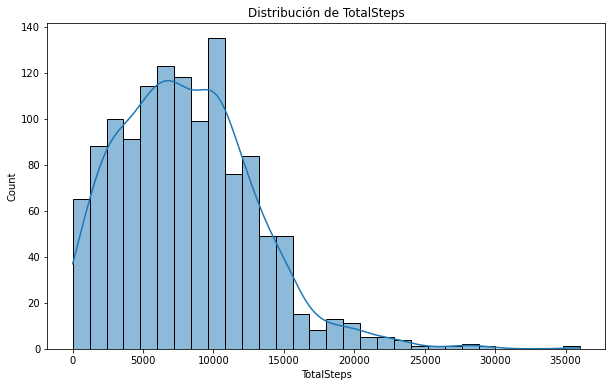

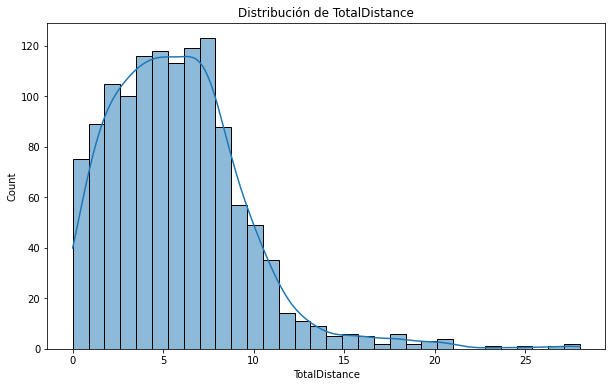

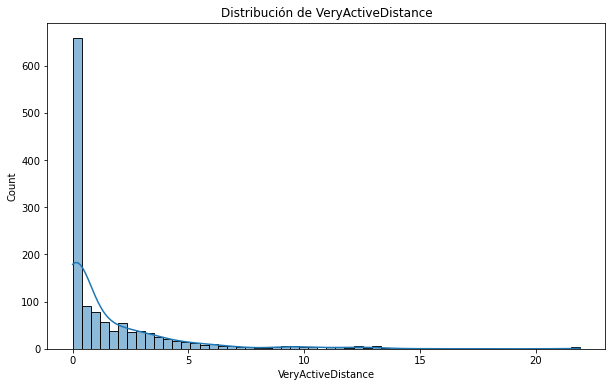

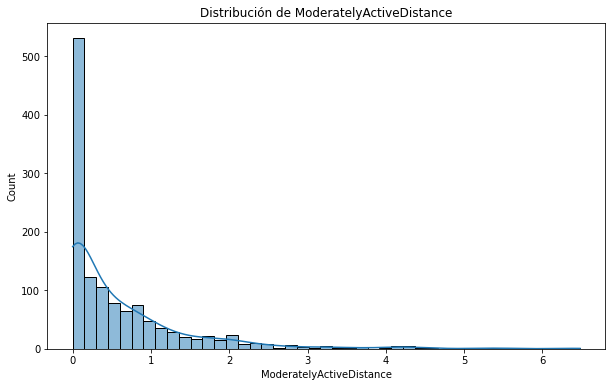

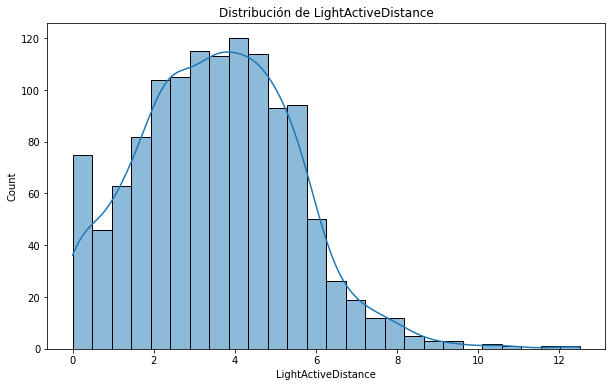

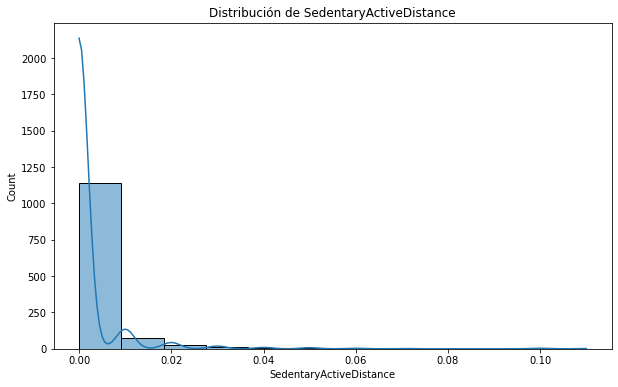

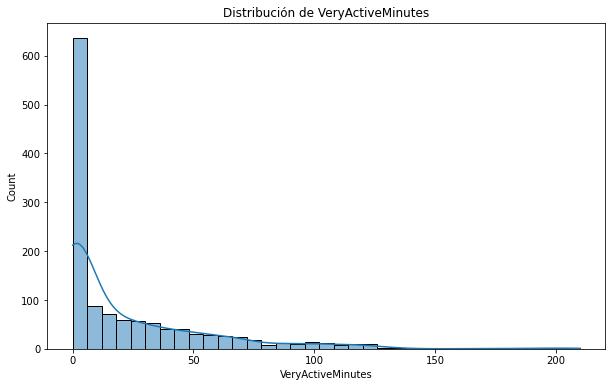

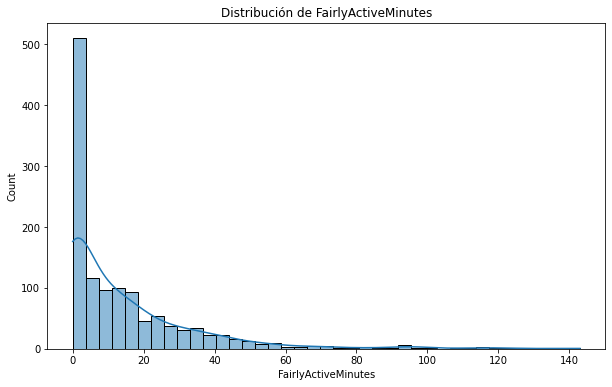

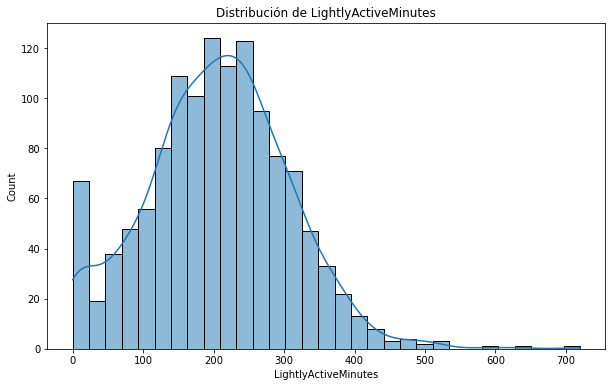

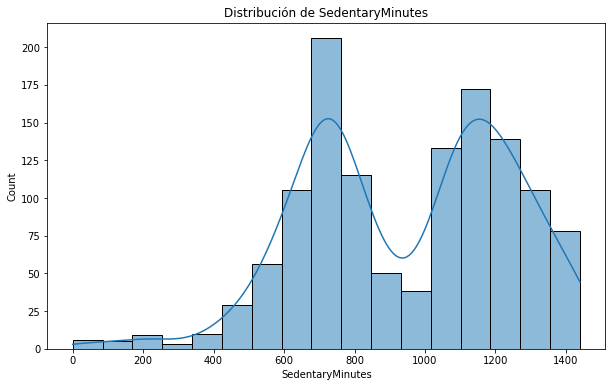

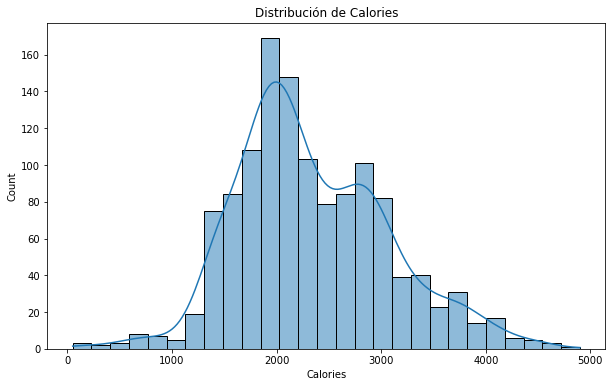

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
# Asegúrate de que 'df' es tu DataFrame
for column in df.columns:
    plt.figure(figsize=(10, 6)) # Ajusta el tamaño de la figura
    sns.histplot(df[column], kde=True) # Crea un histograma con una línea de densidad
    plt.title(f'Distribución de {column}') # Título del gráfico
    plt.show() # Muestra el gráfico

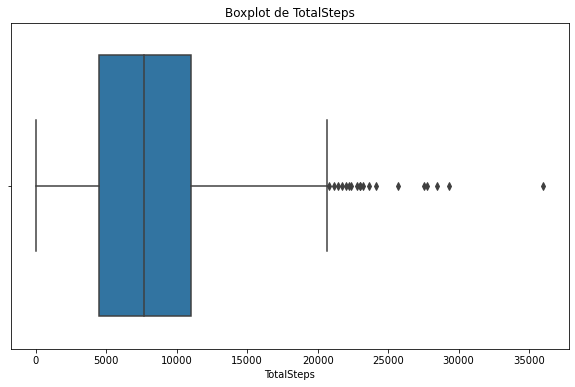

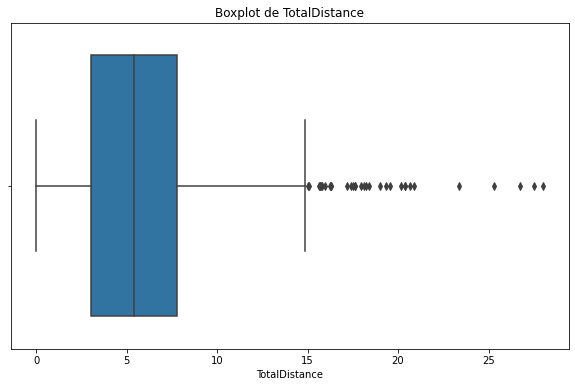

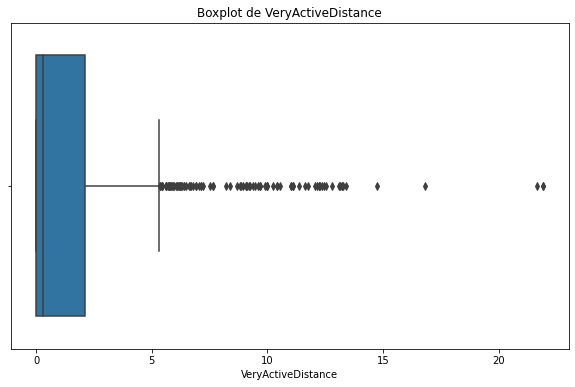

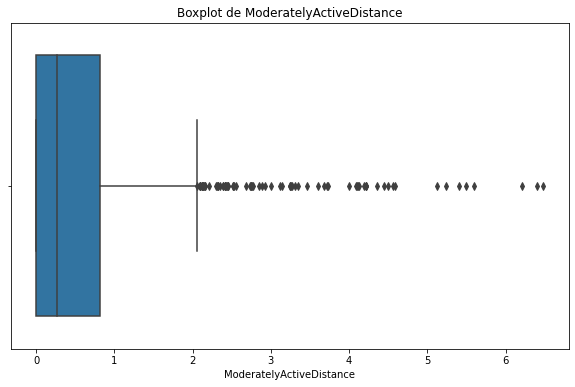

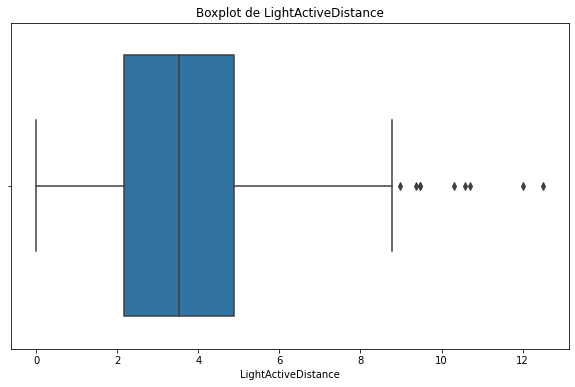

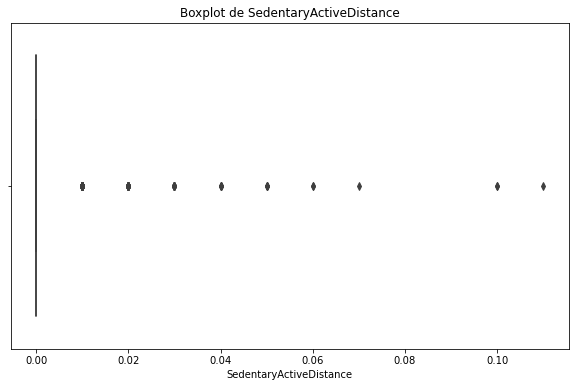

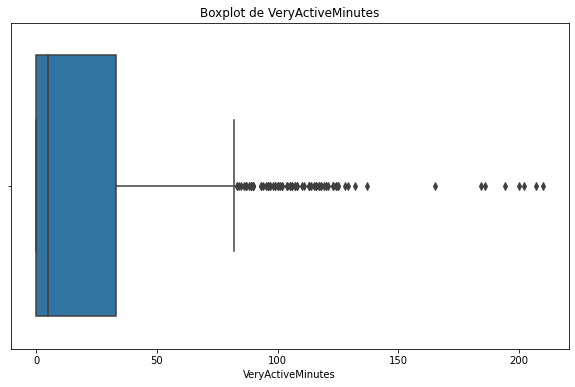

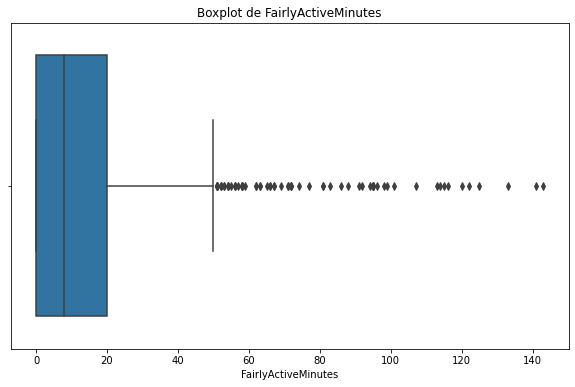

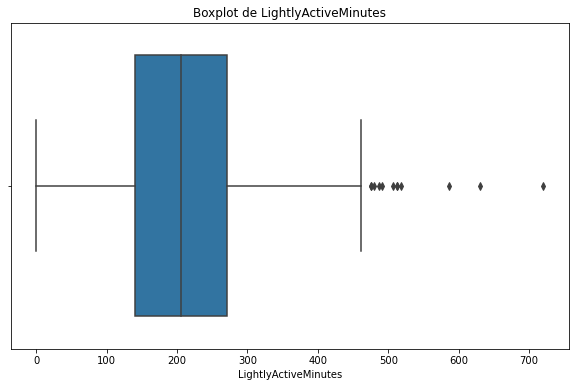

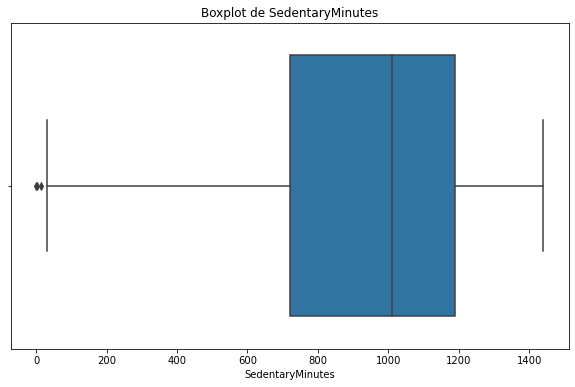

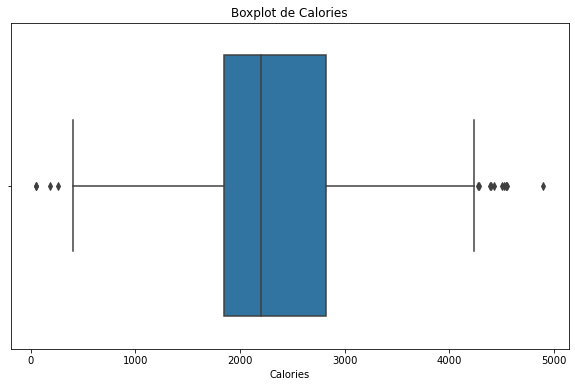

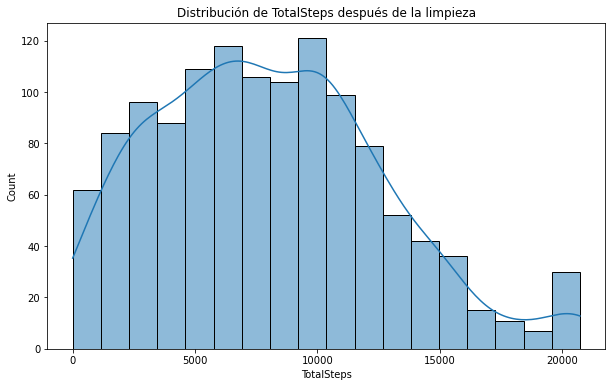

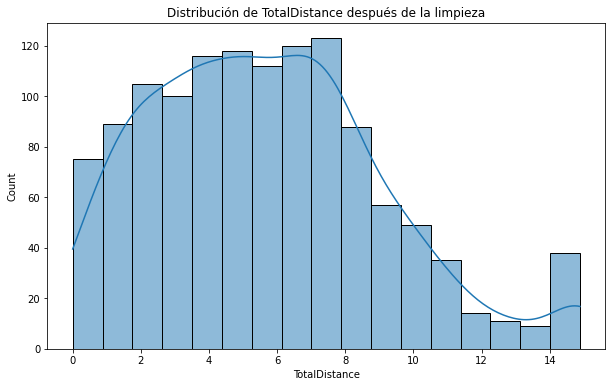

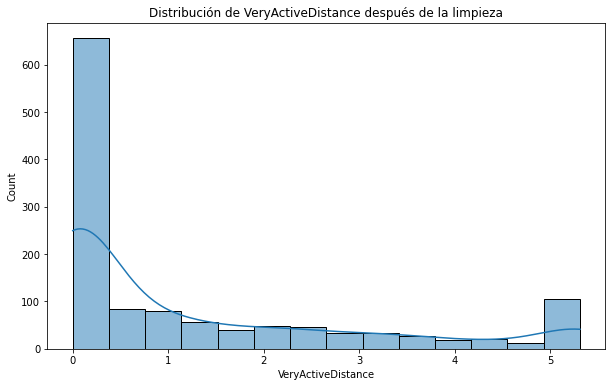

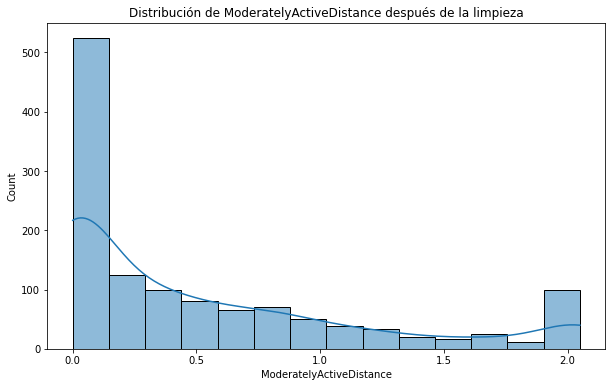

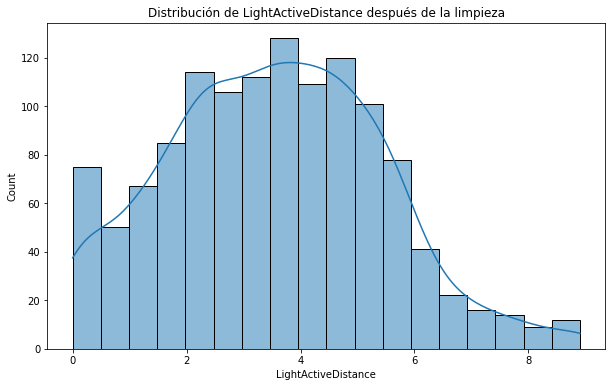

/home/david/bin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


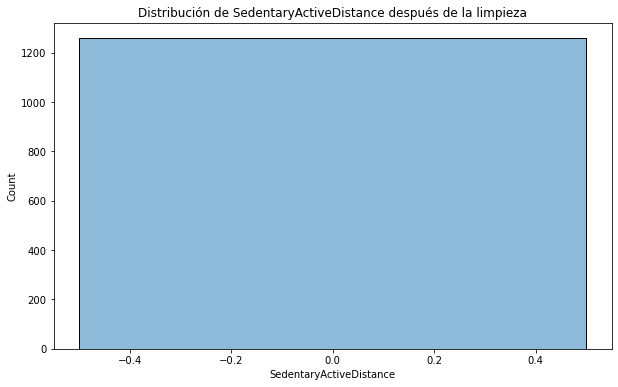

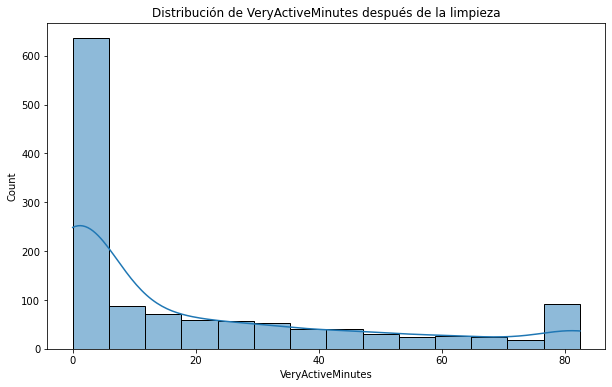

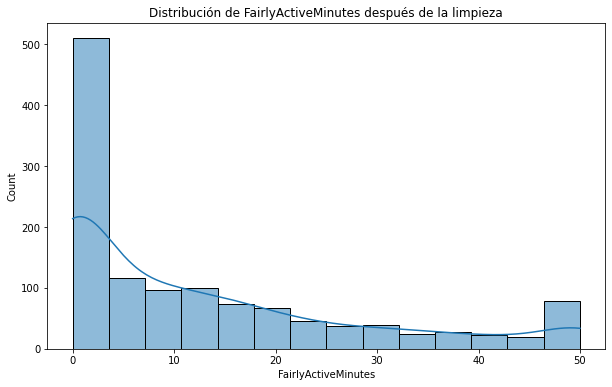

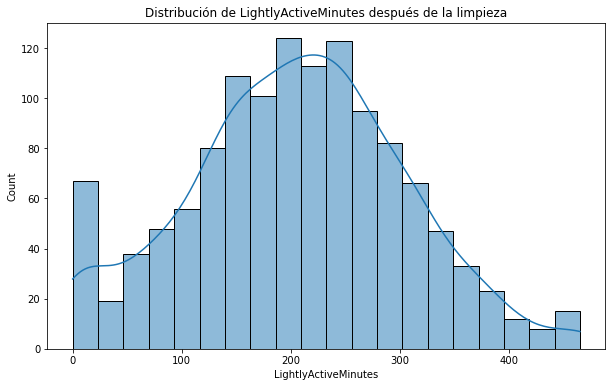

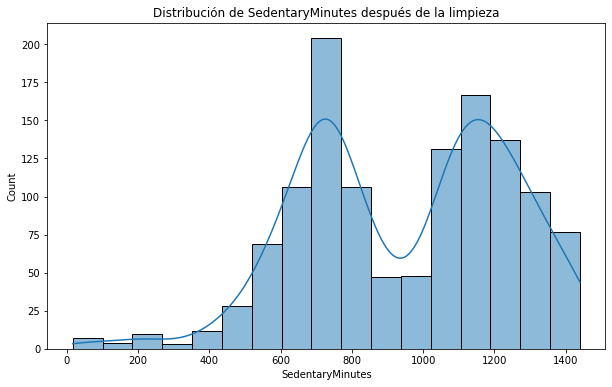

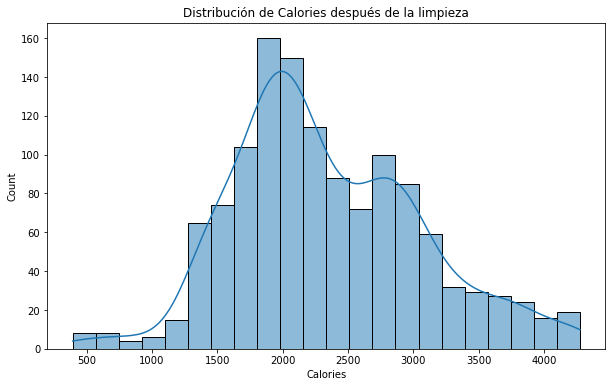

In [26]:
for column in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot de {column}')
    plt.show()  

# Reemplazar outliers con el valor mínimo o máximo dentro del rango de IQR
df_clean = df.copy()
for column in df.columns:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        df_clean.loc[df[column] < (Q1 - 1.5 * IQR), column] = Q1 - 1.5 * IQR
        df_clean.loc[df[column] > (Q3 + 1.5 * IQR), column] = Q3 + 1.5 * IQR

# for column in df_clean.columns:
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x=df_clean[column])
#     plt.title(f'Boxplot de {column} sin outliers')
#     plt.show()

 
for column in df_clean.columns:
    plt.figure(figsize=(10, 6))  
    sns.histplot(df_clean[column], kde=True) 
    plt.title(f'Distribución de {column} después de la limpieza') 
    plt.show() 

In [27]:
df = df_clean
for x in df.columns:
    print(f"El kurtosis de {x} es {df[x].kurtosis()}")
    print(f"La Asimetría de {x} es {df[x].skew()}")

El kurtosis de TotalSteps es -0.13411375671791115
La Asimetría de TotalSteps es 0.46601132970031484
El kurtosis de TotalDistance es 0.02537562574122898
La Asimetría de TotalDistance es 0.5627502132620352
El kurtosis de VeryActiveDistance es 0.29285059300761684
La Asimetría de VeryActiveDistance es 1.2701386787501856
El kurtosis de ModeratelyActiveDistance es 0.28910364284685386
La Asimetría de ModeratelyActiveDistance es 1.194436029870718
El kurtosis de LightActiveDistance es -0.2701136834830362
La Asimetría de LightActiveDistance es 0.19448852823721896
El kurtosis de SedentaryActiveDistance es 0
La Asimetría de SedentaryActiveDistance es 0
El kurtosis de VeryActiveMinutes es 0.20489642157079357
La Asimetría de VeryActiveMinutes es 1.2242892166788695
El kurtosis de FairlyActiveMinutes es 0.22761233183859497
La Asimetría de FairlyActiveMinutes es 1.1476363200411543
El kurtosis de LightlyActiveMinutes es -0.22248575661457393
La Asimetría de LightlyActiveMinutes es 0.007098592241974313
El

TotalSteps tiene una distribucion con una cola menos pesada y asimetria moderada lo que sugiere que hay valores mas extremos y que la distribucion es mas pesada en la cola. VeryActiveDistance tiene una asimetria alta, lo que indica una distribucion mas asimetrica con mas valores en una cola de distribucion que en la otra.

In [144]:
from scipy.stats import kstest, norm, shapiro
import numpy as np

# Suponiendo que 'TotalSteps' es una columna de un DataFrame llamado df
total_steps = df['TotalSteps']
# Asegúrate de que 'TotalSteps' es una columna de tu DataFrame df
# Selecciona 100 filas aleatorias de 'TotalSteps'


for x in df.columns:
    test = df[x].sample(100)
    D, p_value = kstest(test, 'norm')
    print(x)    
    print(f"D = {D}")
    print(f"p-value = {p_value}")
    print()

TotalSteps
D = 0.9999999999987201
p-value = 0.0

TotalDistance
D = 0.8671262791920825
p-value = 5.773354187926709e-88

VeryActiveDistance
D = 0.5
p-value = 1.2131434371817858e-23

ModeratelyActiveDistance
D = 0.5
p-value = 1.2131434371817858e-23

LightActiveDistance
D = 0.813641483001024
p-value = 1.0891338645919393e-72

SedentaryActiveDistance
D = 0.5
p-value = 1.2131434371817858e-23

VeryActiveMinutes
D = 0.5399683287581669
p-value = 8.097219962048007e-28

FairlyActiveMinutes
D = 0.6572498680518208
p-value = 7.094717615931469e-43

LightlyActiveMinutes
D = 0.98
p-value = 2.5353012004566838e-170

SedentaryMinutes
D = 1.0
p-value = 0.0

Calories
D = 1.0
p-value = 0.0

combined_column
D = 0.5407738277724827
p-value = 6.60195220768577e-28



La discrepancia entre los resultados de la prueba de Kolmogorov-Smirnov (K-S) y las medidas de kurtosis y asimetría puede surgir debido a varias razones. La kurtosis y la asimetría son medidas estadísticas que describen la forma de la distribución de una variable, pero no son suficientes por sí solas para determinar si una distribución es normal. La normalidad es una propiedad compleja que se refiere a la forma específica de la distribución, y la K-S es una prueba no paramétrica que evalúa la similitud entre la distribución empírica de una muestra y una distribución teórica (en este caso, la distribución normal).

### K-S vs. Kurtosis y Asimetría

- **K-S**: Esta prueba es sensible a la ubicación y la escala de la distribución, pero no a su forma. Por lo tanto, puede detectar diferencias significativas entre la distribución empírica y la normal, incluso si la kurtosis y la asimetría son similares.

- **Kurtosis y Asimetría**: Estas medidas describen la forma de la distribución, pero no son suficientes para determinar si una distribución es normal. La normalidad se refiere a la forma específica de la distribución, que es plana y simétrica.

### Interpretación de los Resultados

- **K-S**: Un valor p extremadamente bajo (como el que has proporcionado) indica que la distribución de `SedentaryActiveDistance` es significativamente diferente de la distribución normal.

- **Kurtosis y Asimetría**: Si estas medidas indican que la distribución de `SedentaryActiveDistance` se acerca a la normal, es posible que la diferencia entre la distribución empírica y la normal no sea suficientemente grande para ser detectada por la K-S, especialmente si la muestra es grande.

### Conclusión

La discrepancia entre los resultados de la K-S y las medidas de kurtosis y asimetría sugiere que, aunque la distribución de por ejmplo `SedentaryActiveDistance` puede parecer normal en términos de kurtosis y asimetría, hay diferencias significativas en su forma que la hacen diferente de la distribución normal. Esto puede ser importante dependiendo del contexto y del propósito del análisis. Por ejemplo, si estás utilizando métodos estadísticos que asumen normalidad, es posible que necesites considerar transformaciones de los datos o utilizar métodos no paramétricos que no requieran la suposición de normalidad.

TotalSteps
W = 0.935978353023529
p-value = 0.010333478450775146


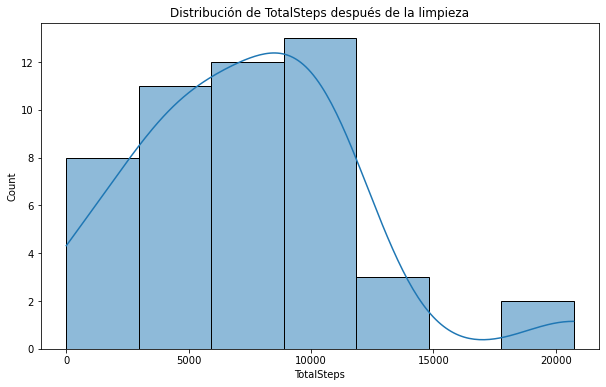


TotalDistance
W = 0.9450923204421997
p-value = 0.023466721177101135


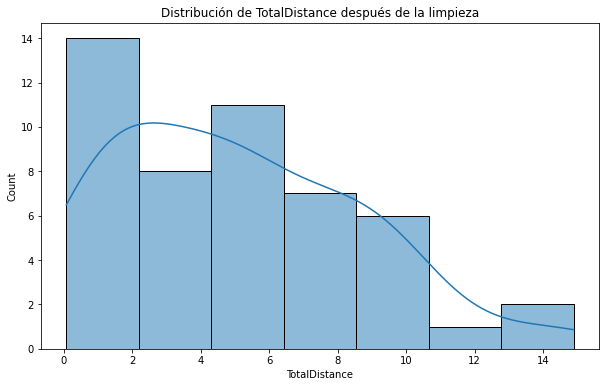


VeryActiveDistance
W = 0.6638133525848389
p-value = 2.507847485233583e-09


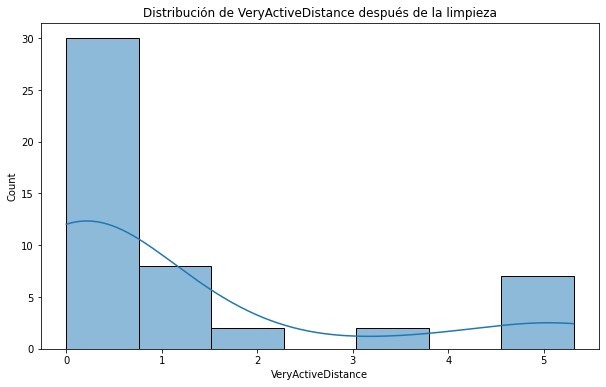


ModeratelyActiveDistance
W = 0.7110828757286072
p-value = 1.6579157602336636e-08


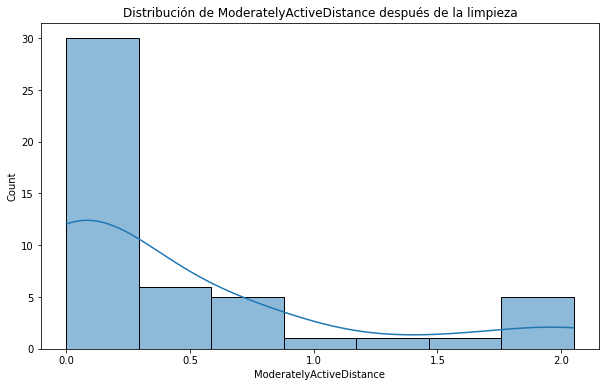


LightActiveDistance
W = 0.984726071357727
p-value = 0.7699133157730103


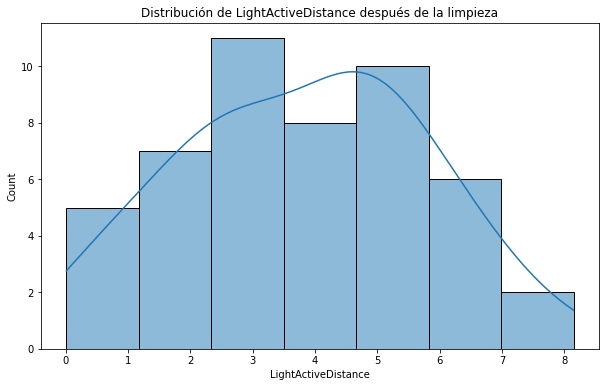


SedentaryActiveDistance
W = 1.0
p-value = 1.0


/home/david/bin/anaconda3/lib/python3.8/site-packages/scipy/stats/_morestats.py:1758: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/david/bin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


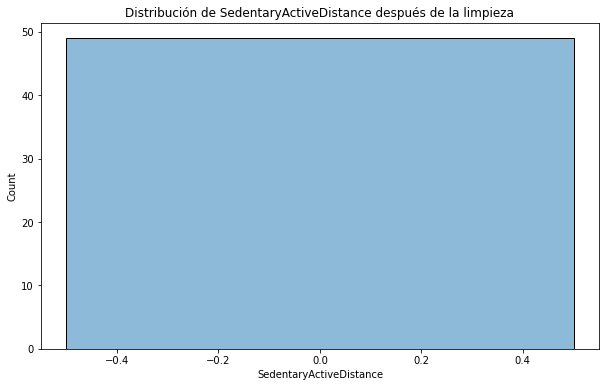


VeryActiveMinutes
W = 0.7876220941543579
p-value = 5.628065196106036e-07


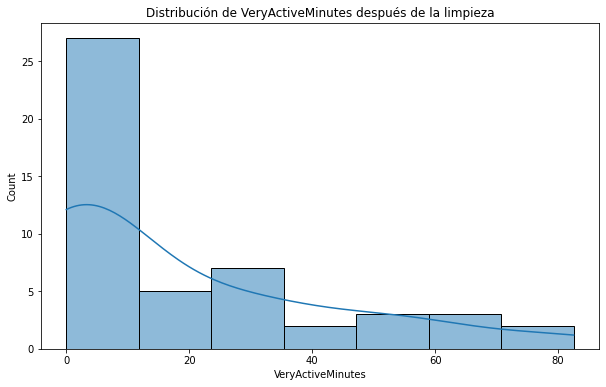


FairlyActiveMinutes
W = 0.8094526529312134
p-value = 1.7653035229159286e-06


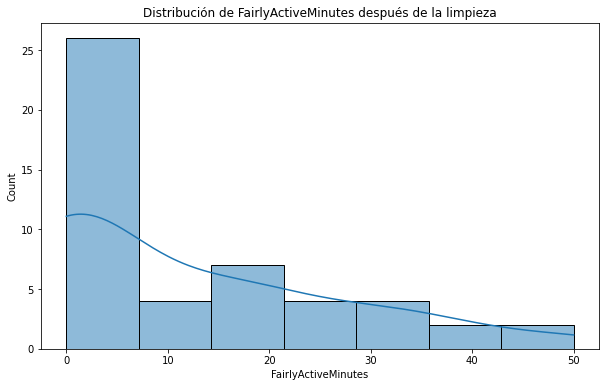


LightlyActiveMinutes
W = 0.9782519936561584
p-value = 0.49435198307037354


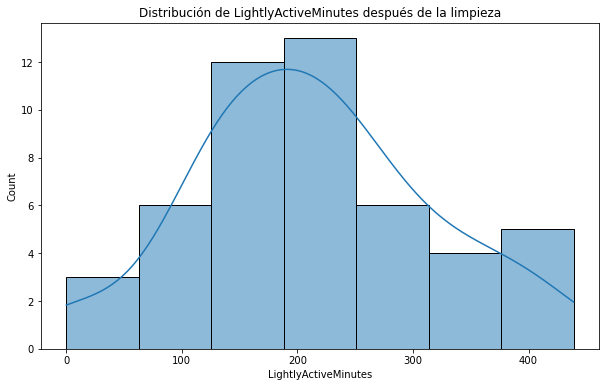


SedentaryMinutes
W = 0.9273108839988708
p-value = 0.004876418504863977


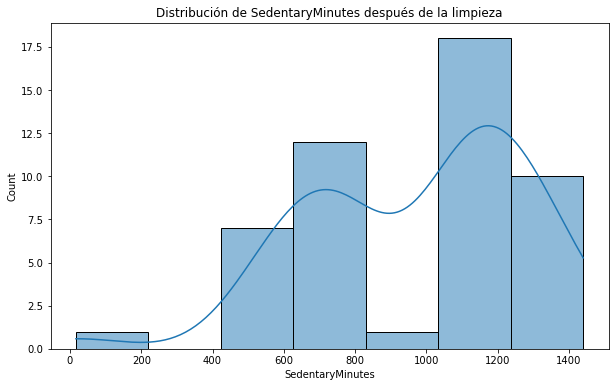


Calories
W = 0.9798765182495117
p-value = 0.5600964426994324


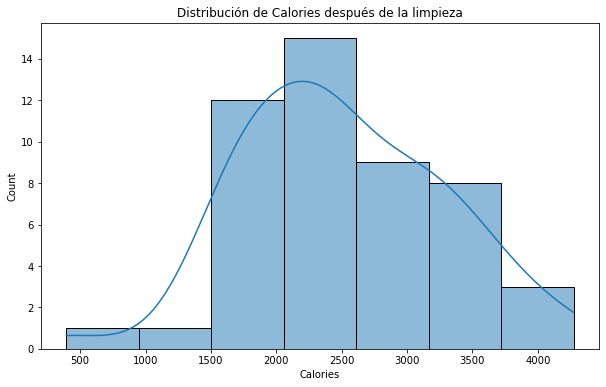


combined_column
W = 0.7515380382537842
p-value = 9.828045932636087e-08


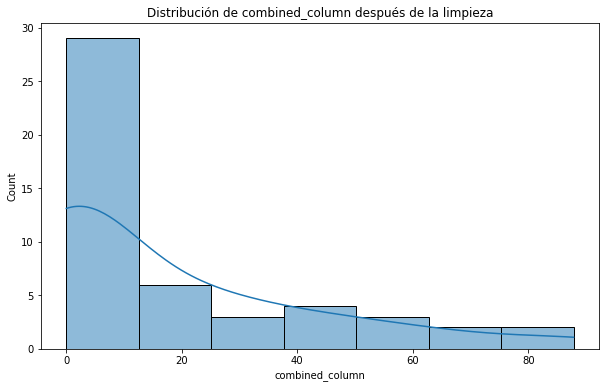

In [146]:
for x in df.columns:
    test = df[x].sample(49)
    W, p_value = shapiro(test)
    print(x)    
    print(f"W = {W}")
    print(f"p-value = {p_value}")
    plt.figure(figsize=(10, 6))  
    sns.histplot(test, kde=True) 
    plt.title(f'Distribución de {x} después de la limpieza') 
    plt.show() 
    print()

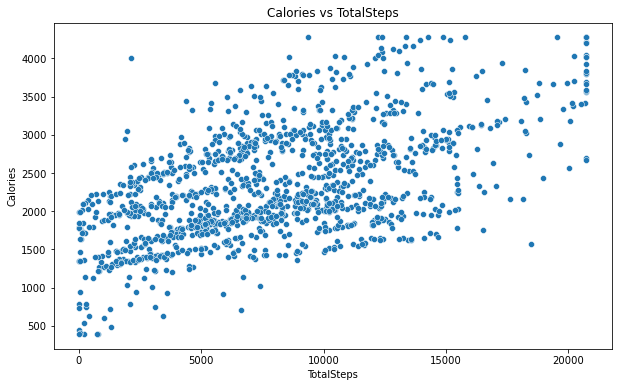

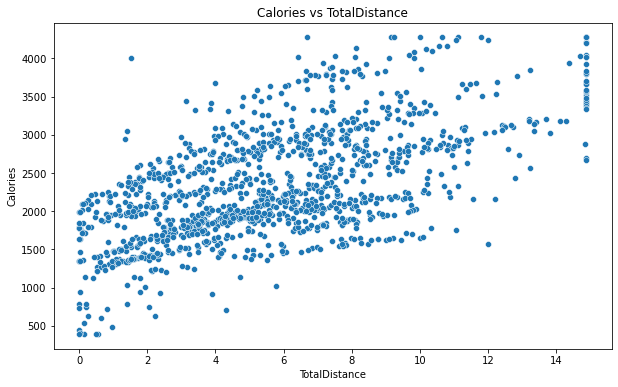

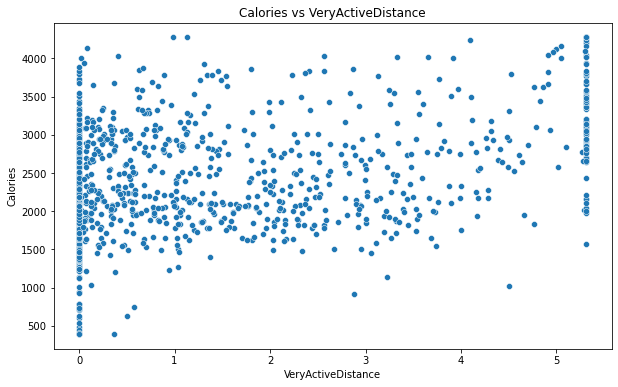

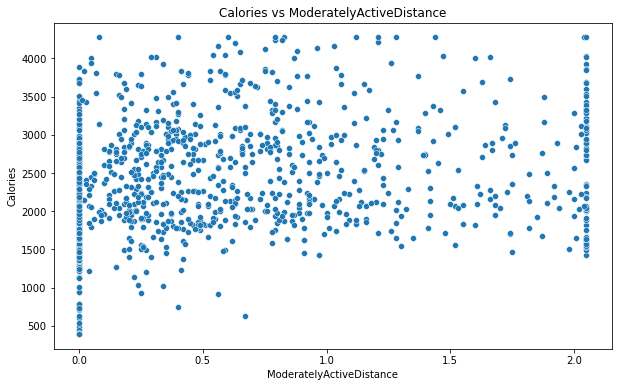

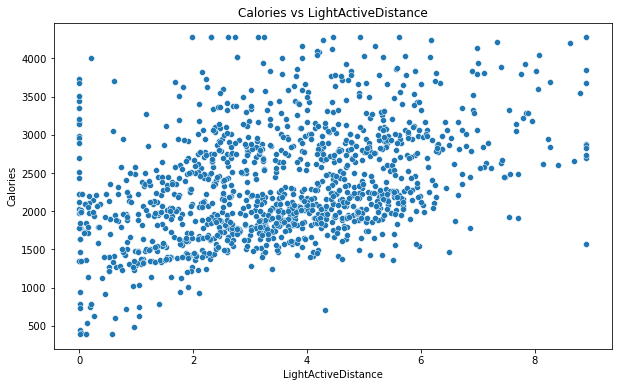

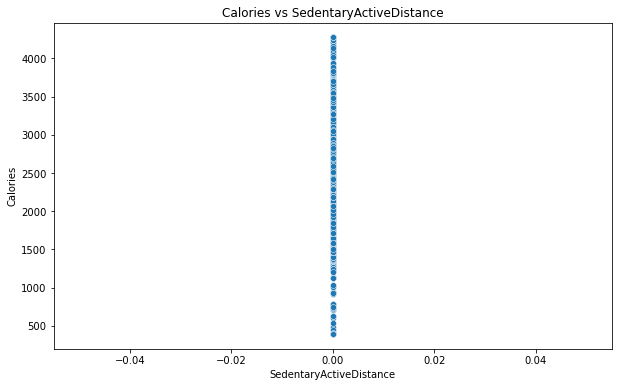

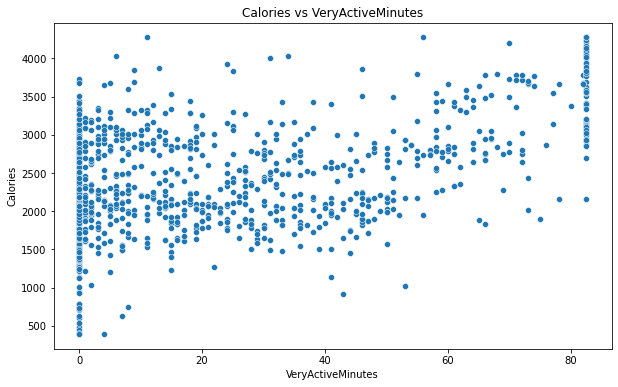

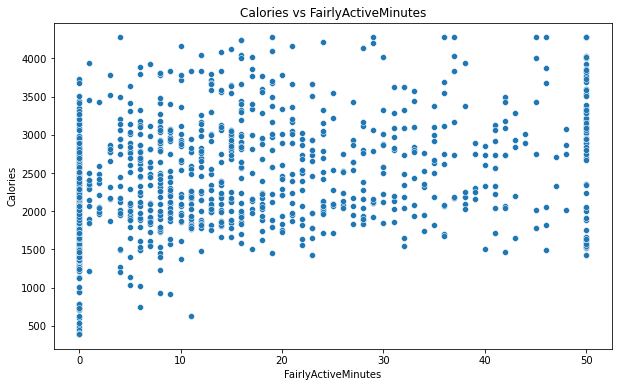

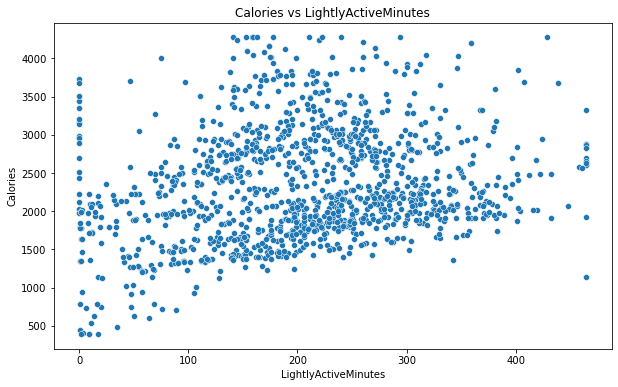

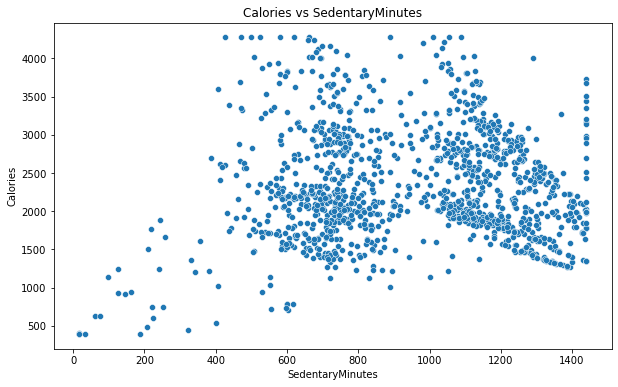

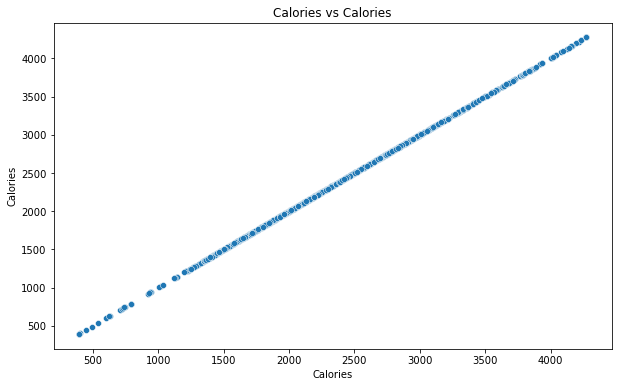

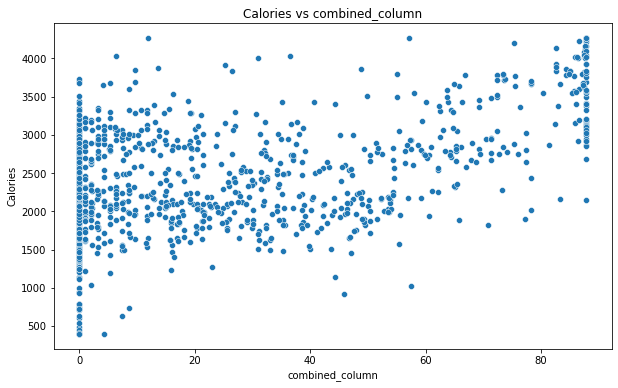

In [34]:
import seaborn as sns

# Identificar las columnas que terminan en "Minutes"
minutes_columns = [col for col in df.columns if col.endswith('Minutes')]

# Iterar sobre las columnas identificadas y generar un gráfico de puntos
for column in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=f'{column}', y='Calories', data=df)
    plt.title(f'Calories vs {column}')
    plt.show()

                          TotalSteps  TotalDistance  VeryActiveDistance  \
TotalSteps                     1.000          0.989               0.736   
TotalDistance                  0.989          1.000               0.756   
VeryActiveDistance             0.736          0.756               1.000   
ModeratelyActiveDistance       0.559          0.545               0.339   
LightActiveDistance            0.659          0.645               0.144   
SedentaryActiveDistance          NaN            NaN                 NaN   
VeryActiveMinutes              0.695          0.706               0.909   
FairlyActiveMinutes            0.543          0.529               0.360   
LightlyActiveMinutes           0.503          0.470               0.038   
SedentaryMinutes              -0.174         -0.158              -0.061   
Calories                       0.560          0.618               0.450   
combined_column                0.701          0.713               0.920   

                        

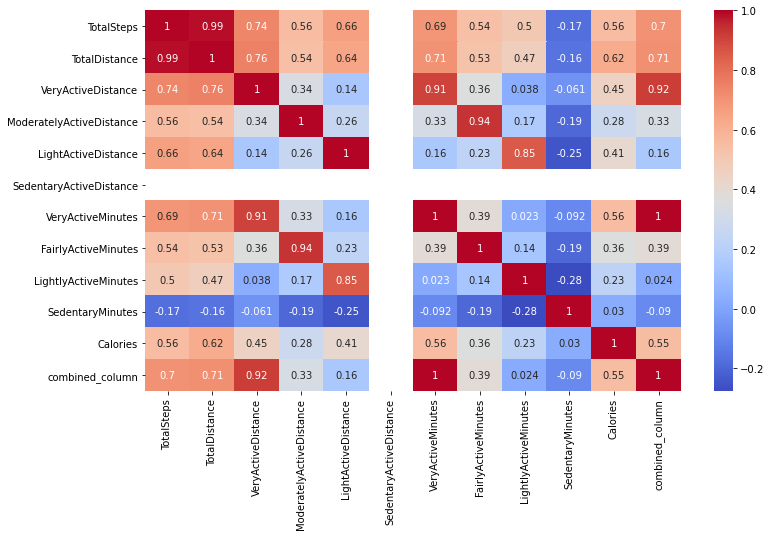

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# # Suponiendo que 'Date' es el nombre de la columna de fecha
# df1 = df.drop(columns=['ActivityDate'])

correlation_matrix = df.corr()
print(correlation_matrix)

fig, ax = plt.subplots(figsize=(12, 7)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split

# Asumiendo que 'df' es tu DataFrame y que 'Calories' es la columna objetivo
X = df.drop('Calories', axis=1) # Variables independientes
y = df['Calories'] # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
import statsmodels.api as sm

# Añadir una constante a X para el modelo lineal
X_train = sm.add_constant(X_train)

# Crear y entrenar el modelo
model = sm.OLS(y_train, X_train).fit()

# Imprimir un resumen del modelo
print(model.summary())

AttributeError: module 'numpy' has no attribute 'MachAr'

In [ ]:
# Añadir una constante a X_test para el modelo lineal
X_test = sm.add_constant(X_test)

# Hacer predicciones con el modelo entrenado
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Error Cuadrático Medio: {mse}")
print(f"Coeficiente de Determinación R^2: {r2}")

Error Cuadrático Medio: 127603.21276722352
Coeficiente de Determinación R^2: 0.7120055866879662


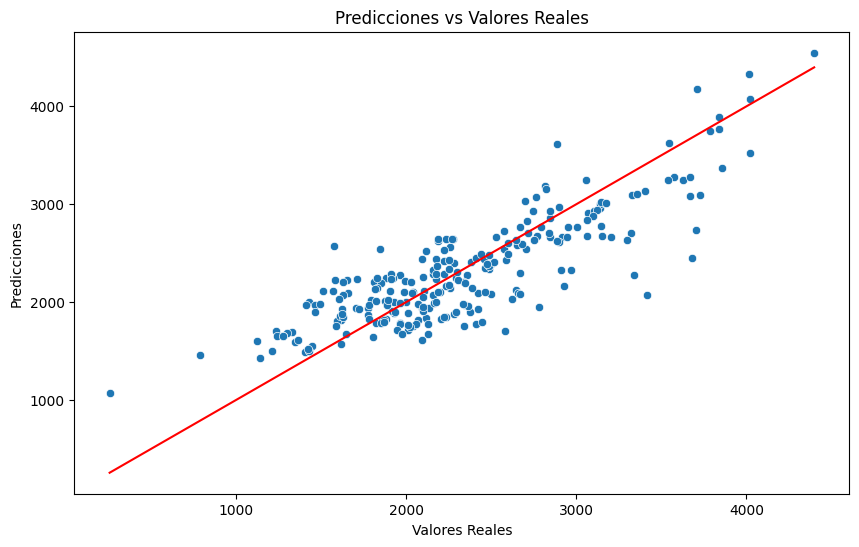

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'y_test' son los valores reales y 'predictions' son las predicciones del modelo
# Crear un DataFrame para facilitar la visualización
data = pd.DataFrame({'Real': y_test, 'Predicted': predictions})

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicted', data=data)

# Añadir una línea de identidad para visualizar la alineación de las predicciones con los valores reales
sns.lineplot(x='Real', y='Real', data=data, color='red')

# Añadir títulos y etiquetas
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Mostrar el gráfico
plt.show()

In [ ]:
residuos = model.resid

In [ ]:
import numpy as np

media_residuos = np.mean(residuos)
suma_residuos = np.sum(residuos)

print(f"Media de los residuos: {media_residuos}")

if np.isclose(media_residuos, 0):
    print("La media de los residuos es cero.")
else:
    print("La media de los residuos no es cero.")

print(f"Suma de los residuos: {suma_residuos}")

if np.isclose(suma_residuos, 0):
    print("La suma de los residuos es cero.")
else:
    print("La suma de los residuos no es cero.")


Media de los residuos: 1.5344720043874573e-10
La media de los residuos es cero.
Suma de los residuos: 1.5452133084181696e-07
La suma de los residuos no es cero.


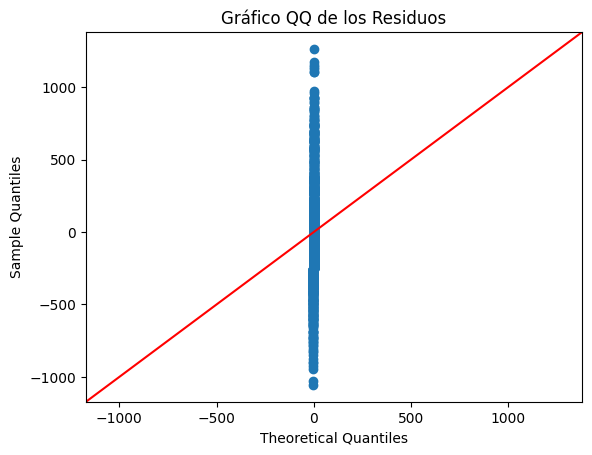

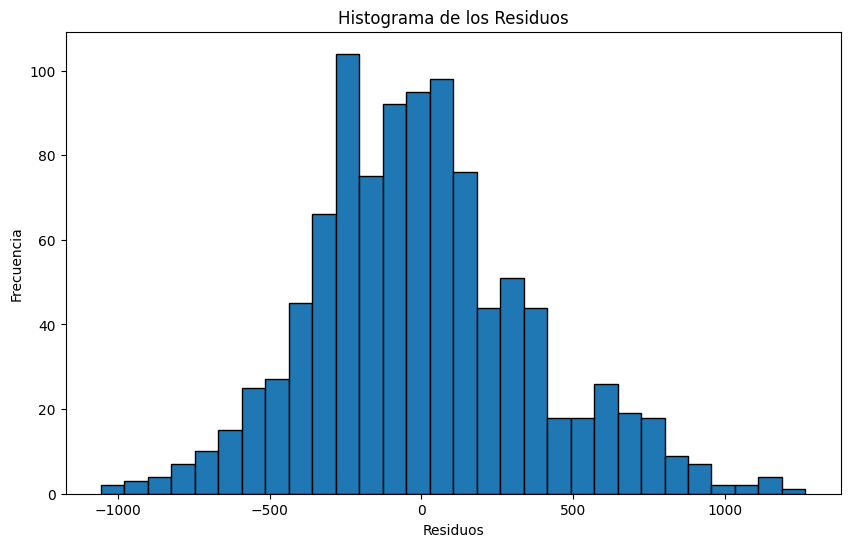

D = 0.5302044335680532, p-value = 1.1503767393612844e-264
Los residuos no parecen estar normalmente distribuidos.


In [ ]:
from scipy.stats import kstest

# Gráfico QQ de los residuos
fig = sm.qqplot(residuos, line='45')
plt.title('Gráfico QQ de los Residuos')
plt.show()

# Histograma de los residuos
plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=30, edgecolor='k')
plt.title('Histograma de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

# Realizar la prueba del Kolmogorov-Smirnov para verificar la normalidad de los residuos
D, p_value = kstest(residuos, 'norm')

print(f"D = {D}, p-value = {p_value}")

if p_value > 0.05:
    print("Los residuos parecen estar normalmente distribuidos.")
else:
    print("Los residuos no parecen estar normalmente distribuidos.")

In [ ]:
from statsmodels.stats.stattools import durbin_watson

# Realizar el test de Durbin-Watson
dw_stat = durbin_watson(model.resid)

print(f"Estadística de Durbin-Watson: {dw_stat}")

# Interpretación de la estadística de Durbin-Watson
if 1.5 < dw_stat < 2.5:
    print("No hay autocorrelación en los residuos.")
elif dw_stat < 1.5:
    print("Hay autocorrelación positiva en los residuos.")
else:
    print("Hay autocorrelación negativa en los residuos.")

Estadística de Durbin-Watson: 1.9953367930370867
No hay autocorrelación en los residuos.


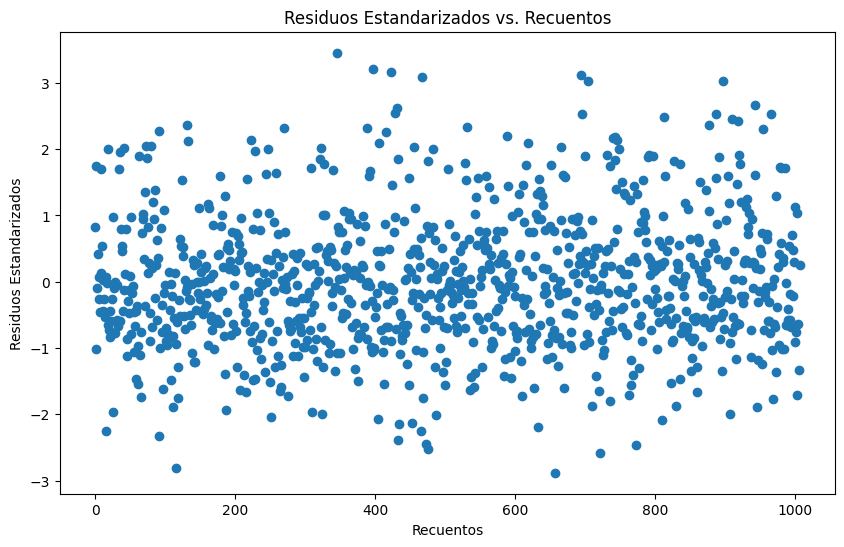

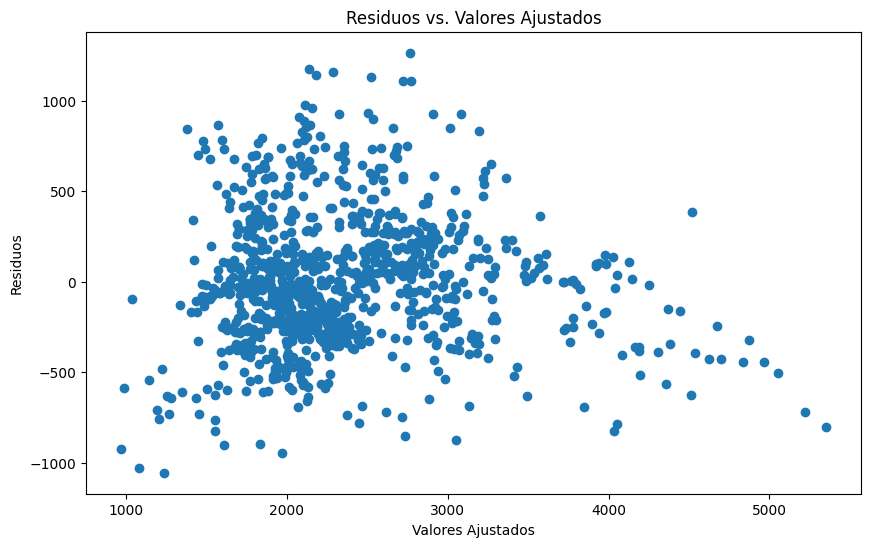

[('Lagrange multiplier statistic', 131.7480274608744), ('p-value', 2.7503314495608647e-22), ('f-value', 13.615745308101708), ('f p-value', 1.5248397234431438e-24)]


In [ ]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

# Calcular los residuos estandarizados
residuos_estandarizados = residuos / np.std(residuos)

# Gráfico de residuos estandarizados contra recuentos
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuos_estandarizados)), residuos_estandarizados)
plt.title('Residuos Estandarizados vs. Recuentos')
plt.xlabel('Recuentos')
plt.ylabel('Residuos Estandarizados')
plt.show()

# Gráfico de residuos vs. valores ajustados
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuos)
plt.title('Residuos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()


# Realizar el test de Breusch-Pagan
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

# Imprimir los resultados del test
print(lzip(names, test))

In [ ]:
from sklearn.model_selection import train_test_split

# Asumiendo que 'df' es tu DataFrame y que 'Calories' es la columna objetivo
X = df.drop('Calories', axis=1) # Variables independientes
y = df['Calories'] # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Predicción por árboles de decisión

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Crear y entrenar el modelo
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Para predecir Calories
predicted_calories = model.predict(X_test)

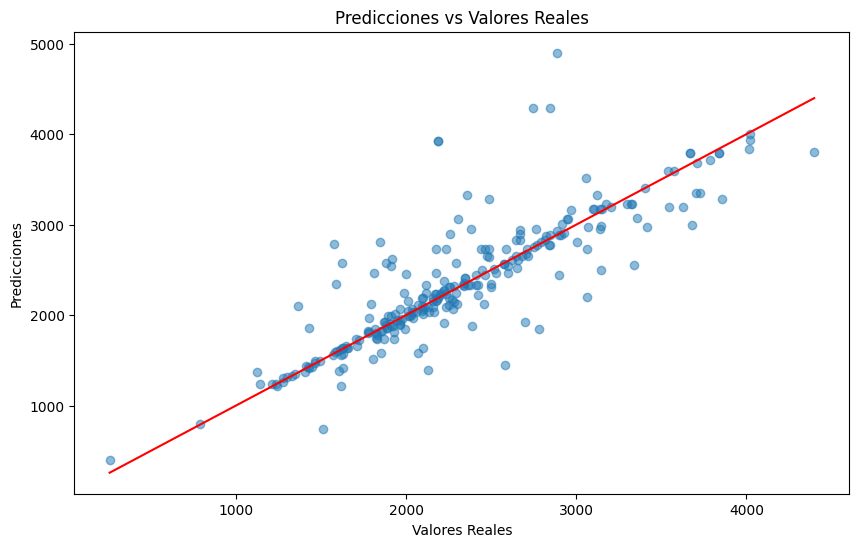

In [ ]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted_calories, alpha=0.5)

# Añadir una línea de identidad para visualizar la alineación de las predicciones con los valores reales
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r-')

# Añadir títulos y etiquetas
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Mostrar el gráfico
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predicted_calories)
r2 = r2_score(y_test, predicted_calories)

print(f"Error Cuadrático Medio: {mse}")
print(f"Coeficiente de Determinación R^2: {r2}")

Error Cuadrático Medio: 143423.59523809524
Coeficiente de Determinación R^2: 0.6762997320369382


### Hipótesis para ANOVA

$H_0$: μ₁ = μ₂ = μ₃ ... = μₖ (donde μ representa los tipos de corredores clasificados (5) según la cantidad de pasos al día que dan).

$H_1$: Al menos una media μ es diferente de las demás.

In [ ]:
import pandas as pd

# contruyamos una categoria
min_value = df['TotalSteps'].min()
max_value = df['TotalSteps'].max()
range_size = (max_value - min_value) / 5

# Definir los intervalos y los nombres de las categorías
bins = [min_value, min_value + range_size, min_value + 2*range_size, min_value + 3*range_size, min_value + 4*range_size, max_value]
labels = ['trainer', 'yunior', 'middle', 'athlean', 'pro']

# Crear la nueva columna 'TotalstepsCat'
df['TotalStepsCat'] = pd.cut(df['TotalSteps'], bins=bins, labels=labels)

# Eliminar filas donde 'TotalStepsCat' no tiene valores
df = df.dropna(subset=['TotalStepsCat'])


Utilizando las funciones `f_oneway` y `ols` no solo sabremos si hay diferencias significativas entre las medias de los grupos, sino que además analizaremos la relacion entre las variables **TotalSteps** y **TotalStepsCat** para saber si tiene algún efecto significativo una sobre la otra

In [ ]:
# Formacion de los 5 grupos
step1 = []
step2 = []
step3 = []
step4 = []
step5 = []

# Iterar sobre las filas del DataFrame
for index, row in df.iterrows():
    if row['TotalStepsCat'] == 'trainer':
        step1.append(float(row['TotalSteps']))
    elif row['TotalStepsCat'] == 'yunior':
        step2.append(float(row['TotalSteps']))
    elif row['TotalStepsCat'] == 'middle':
        step3.append(float(row['TotalSteps']))
    elif row['TotalStepsCat'] == 'athlean':
        step4.append(float(row['TotalSteps']))
    elif row['TotalStepsCat'] == 'pro':
        step5.append(float(row['TotalSteps']))

from scipy.stats import f_oneway
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Realiza la prueba ANOVA
f_stat, p_value = f_oneway(step1, step2, step4, step4, step5)
print(f"F-Statistic: {f_stat}, P-Value: {p_value}")


modelo = ols('TotalSteps ~ C(TotalStepsCat)', data=df).fit()
anova_results = sm.stats.anova_lm(modelo, typ=1)

print(anova_results)

F-Statistic: 1287.0698376520343, P-Value: 0.0
                      df        sum_sq       mean_sq            F  PR(>F)
C(TotalStepsCat)     4.0  2.473387e+10  6.183468e+09  1556.333317     0.0
Residual          1252.0  4.974322e+09  3.973100e+06          NaN     NaN


Para más detalles sobre estos grupos utilizaremos la prueba de post-hoc de Turkey, y así obtendremos comparaciones entre los grupos y vemos qué grupos específicos difieren entre sí.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Realiza la prueba post-hoc de Tukey
tukey_results = pairwise_tukeyhsd(endog=df['TotalSteps'], groups=df['TotalStepsCat'], alpha=0.05)

# Muestra los resultados
print(tukey_results) 

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1  group2   meandiff  p-adj    lower       upper    reject
----------------------------------------------------------------
athlean  middle  -7455.8274   0.0  -9008.6823  -5902.9725   True
athlean     pro   8558.6429   0.0   4442.5266  12674.7591   True
athlean trainer  -20131.263   0.0 -21604.0187 -18658.5073   True
athlean  yunior -13810.6753   0.0 -15283.9887 -12337.3619   True
 middle     pro  16014.4703   0.0  12126.2614  19902.6792   True
 middle trainer -12675.4356   0.0 -13262.6019 -12088.2692   True
 middle  yunior  -6354.8479   0.0  -6943.4117  -5766.2841   True
    pro trainer -28689.9059   0.0 -32546.8242 -24832.9875   True
    pro  yunior -22369.3182   0.0 -26226.4495 -18512.1868   True
trainer  yunior   6320.5877   0.0    5998.007   6643.1684   True
----------------------------------------------------------------


#### Analisis de los resultados de la prueba Tukey

- group1 y group2: Los nombres de los grupos entre los cuales se está haciendo la comparación.
- meandiff: La diferencia entre las medias de los dos grupos.
- p-adj: El valor p ajustado para las comparaciones múltiples. Un valor p bajo (por ejemplo, menor que 0.05) indica que la diferencia en las medias es estadísticamente significativa.
- lower y upper: Los límites del intervalo de confianza para la diferencia entre las medias. Si este intervalo no incluye el 0, sugiere una diferencia significativa entre los grupos.
- reject: Un valor booleano (True/False) que indica si se debe rechazar la hipótesis nula de que las medias de los grupos son iguales. True significa que la diferencia es estadísticamente significativa.

### 1. Poblaciones normales

**Aplicando el test de Kolmogorov-Smirnov**



$H_0$: Los datos siguen una distribución Normal 

$H_1$: Los datos no siguen una distribución Normal 

In [ ]:
# Poblaciones normales
from scipy import stats

stat, p = stats.shapiro(step1)

print('Group1 - Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))

if p < 0.05:
    print("There is evidence to reject the null hypothesis that the values follow a normal distribution.")
else:
    print("There is not enough evidence to reject the null hypothesis that the values follow a normal distribution.")


Group1 - Shapiro-Wilk Test: Statistics=0.955, p=0.000
There is evidence to reject the null hypothesis that the values follow a normal distribution.


### 2. Homogeneidad de los errores

Test de Levene:

H_0: Igualdad de varianzas (Homocedasticidad)

H_1: Las varianzas son diferentes


In [ ]:
# Test de Levene
stat, p = stats.levene(step1, step2, step3, step4, step5)
print('Levene Test: Statistics=%.3f, p=%.3f' % (stat, p))

#test de breusch-pagan
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan

# Extrae los residuos y las variables independientes (predictores) ajustadas
residuos = modelo.resid
variables_independientes = modelo.model.exog

# Realiza el test de Breusch-Pagan
bp_test = het_breuschpagan(residuos, variables_independientes)

print(f'Valor de estadístico de Lagrange: {bp_test[0]}')
print(f'p-valor del test: {bp_test[1]}')
print(f'Valor del estadístico F: {bp_test[2]}')
print(f'p-valor del test F: {bp_test[3]}')


Levene Test: Statistics=3.139, p=0.014
Valor de estadístico de Lagrange: 12.586206519861241
p-valor del test: 0.013485043221308881
Valor del estadístico F: 3.165733666210317
p-valor del test F: 0.013350894038577676


### Estadístico de Durbin-Watson

Evaluemos la autocorrelación en los residuos de un modelo de regresión lineal. 

$H_0$: No existe correlación entre los residuos.

$H_1$: Los residuos están autocorrelacionados.

In [ ]:
from statsmodels.stats.stattools import durbin_watson

# Calcula el estadístico de Durbin-Watson
dw = durbin_watson(modelo.resid)

print(f"Estadístico de Durbin-Watson: {dw}")

alpha =0.5

if 2 - alpha <= dw <= 2 + alpha:
    print("The residuals are uncorrelated.")
elif dw > 2 + 0.5:
    print("There is a positive autocorrelation.")
else:
    print("There is a negative autocorrelation.")

Estadístico de Durbin-Watson: 1.7260635641351405
The residuals are uncorrelated.


# PCA

Aplicando la técnica PCA (Principal Component Analysis) vamos a reducir la dimensionalidad de los datos

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Primero estandarizamos los datos para asegurarnos de que estaremos trabajando con datos en la misma escala

In [ ]:
# Seleccionamos las variables que vamos a analizar
pca_data = df[['TotalSteps', 'TotalDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']]


scaler = StandardScaler()
scaled_results = scaler.fit_transform(pca_data)

pca_data.columns

Index(['TotalSteps', 'TotalDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [ ]:
# Aplicando PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_results)
print(pca_results)

[[ 0.48686502 -0.07308164]
 [ 3.21706311  0.68300487]
 [ 1.33346966  0.03681973]
 ...
 [ 0.94062577 -0.56184018]
 [ 5.83500412  2.24971866]
 [-0.45341283  0.01398025]]


Se realiza un análisis de los componentes principales y para cada uno de los dos primeros se identifican las cinco características más importantes. Esto se hace tomando el valor absoluto de cada componente principal y seleccionando las cinco características con los valores más altos. Esto es útil porque nos permite entender qué características contribuyen más a cada componente principal.

In [ ]:
# Análisis de los componentes principales
principal_components = pd.DataFrame(pca.components_, columns=pca_data.columns)

# Identificar características más importantes para los primeros dos componentes principales
principal_component1 = principal_components.iloc[0]
principal_component2 = principal_components.iloc[1]

# Obtener las características más importantes para el primer componente principal (PC1)
pc1_characteristics = principal_component1.abs().nlargest(5).index
print("Las 5 características más importantes para el primer componente principal (PC1) son:")
for i, characteristic in enumerate(pc1_characteristics, start=1):
    print(f"{i}. {characteristic}")

# Obtener las características más importantes para el segundo componente principal (PC2)
pc2_characteristics = principal_component2.abs().nlargest(5).index
print("\nLas 5 características más importantes para el segundo componente principal (PC2) son:")
for i, characteristic in enumerate(pc2_characteristics, start=1):
    print(f"{i}. {characteristic}")


Las 5 características más importantes para el primer componente principal (PC1) son:
1. TotalSteps
2. TotalDistance
3. VeryActiveDistance
4. VeryActiveMinutes
5. Calories

Las 5 características más importantes para el segundo componente principal (PC2) son:
1. LightlyActiveMinutes
2. LightActiveDistance
3. VeryActiveMinutes
4. VeryActiveDistance
5. SedentaryMinutes


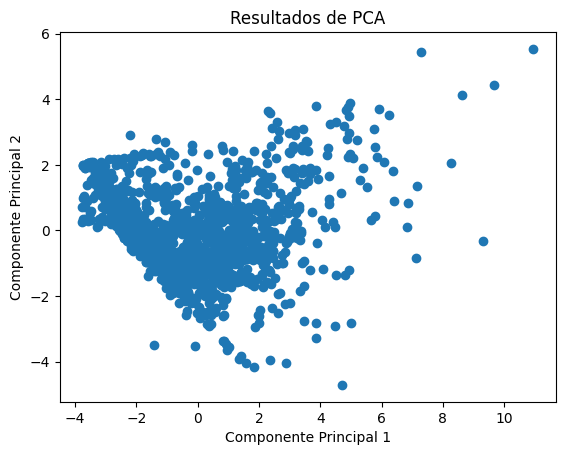

In [ ]:
# Visualizar los resultados de PCA
plt.scatter(pca_results[:, 0], pca_results[:, 1])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Resultados de PCA')
plt.show()

A través del cálculo de la varianza explicada por cada componente nos da una idea acerca de cuánta variación es capturada por cada componente principal

Varianza explicada:
Componente principal 1: 42.81%
Componente principal 2: 16.49%

Varianza acumulada:
Hasta el componente principal 1: 42.81%
Hasta el componente principal 2: 59.30%


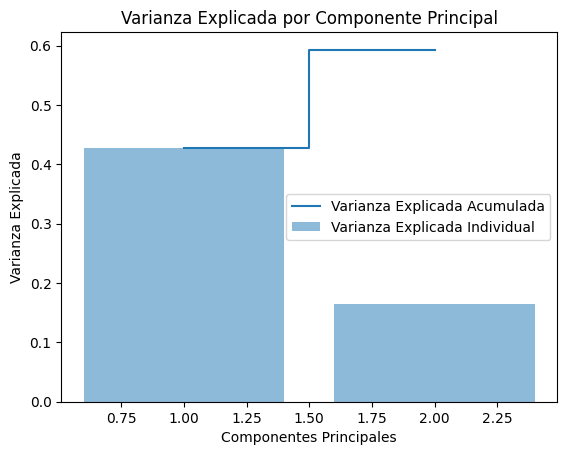

In [ ]:
# Calcular la varianza explicada
explained_variance = pca.explained_variance_ratio_
acum_variance = np.cumsum(explained_variance)

print("Varianza explicada:")
for i, varianza in enumerate(explained_variance, start=1):
    print(f"Componente principal {i}: {varianza:.2%}")

print("\nVarianza acumulada:")
for i, varianza_acum in enumerate(acum_variance, start=1):
    print(f"Hasta el componente principal {i}: {varianza_acum:.2%}")

# Visualizar la varianza explicada
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Varianza Explicada Individual')
plt.step(range(1, len(explained_variance) + 1), acum_variance, where='mid', label='Varianza Explicada Acumulada')
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
plt.legend()
plt.show()

Realizamos un análisis de los componentes principales y se visualizamos la importancia de las características en cada componente principal a través de un mapa de calor.

Componentes principales 1 y 2:
  TotalSteps    TotalDistance    VeryActiveDistance    ModeratelyActiveDistance    LightActiveDistance    SedentaryActiveDistance    VeryActiveMinutes    FairlyActiveMinutes    LightlyActiveMinutes    SedentaryMinutes    Calories
------------  ---------------  --------------------  --------------------------  ---------------------  -------------------------  -------------------  ---------------------  ----------------------  ------------------  ----------
   0.444732         0.444473               0.339297                   0.259348                0.286786                  0.0233946             0.335204              0.268106                 0.214049          -0.0986635    0.31573
  -0.0155093        0.0323064              0.381281                  -0.0171034              -0.510309                 -0.0514308             0.381681              0.0283256               -0.585201           0.298673     0.108808


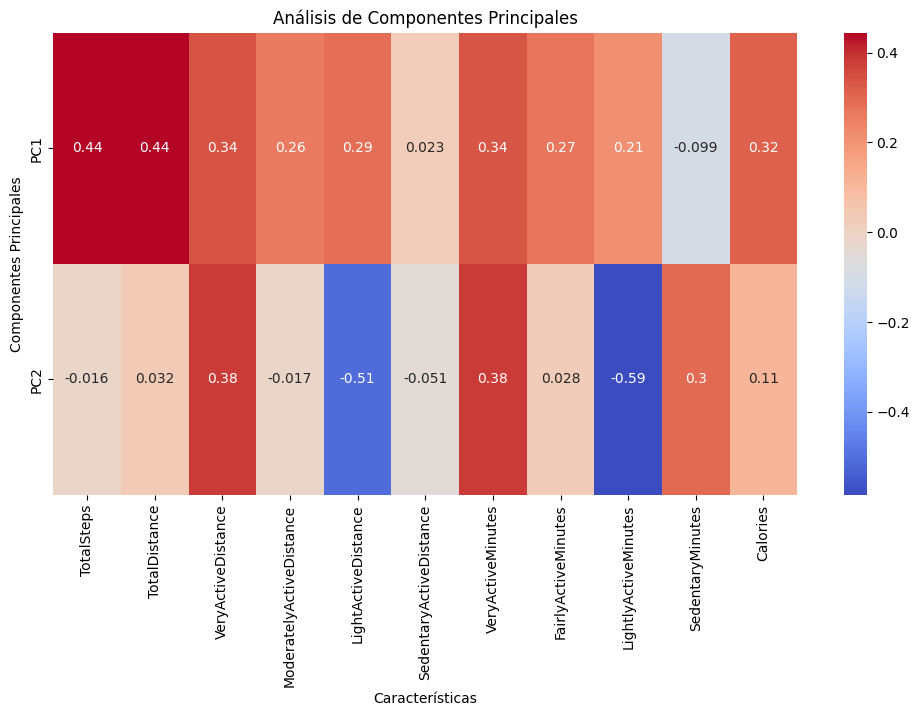

In [ ]:
from tabulate import tabulate

# Seleccionar solo los componentes principales 1 y 2
principal_components_1_2 = principal_components.iloc[:2]

# Convertir el DataFrame de componentes principales 1 y 2 en una lista de listas para tabulate
principal_components_1_2_lista = principal_components_1_2.values.tolist()

# Obtener los nombres de las características originales como encabezados de la tabla
encabezados = principal_components_1_2.columns.tolist()

# Imprimir los componentes principales 1 y 2 en forma de tabla
print("Componentes principales 1 y 2:")
print(tabulate(principal_components_1_2_lista, headers=encabezados))

plt.figure(figsize=(12, 6))
sns.heatmap(principal_components, annot=True, cmap='coolwarm', yticklabels=['PC1', 'PC2'], xticklabels=pca_data.columns)
plt.title('Análisis de Componentes Principales')
plt.xlabel('Características')
plt.ylabel('Componentes Principales')
plt.show()
